### Markowitz Optimization

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import risk_models, expected_returns, EfficientFrontier

TICKERS = ['AAPL','GOOGL','XOM','WMT','V','NVDA','JPM','F']
START_DATE = '2010-01-01'
END_DATE = pd.to_datetime('today')

data = yf.download(
    TICKERS, 
    start = START_DATE, 
    end = END_DATE,
    progress = False,
    interval = '1d'
)['Close']

#### Convex Portfolio Optimization

무위험 이자율을 초과하는 수익률이 기대값 $\mu$와 기대 공분산 $V$를 갖는 $N$개의 보유 자산 포트폴리오를 고려해 보자. Markowitz의 시도는 고전적인 자산 배분 문제를 이차 계획법으로 공식화하는 것이었다.

$$\min_{\omega} \frac{1}{2}\omega^\prime V \omega \text{  subject to } : \omega^\prime a = 1$$

여기서 $a$는 포트폴리오의 제약식을 특정짓는다. 이 문제는 다음과 같은 라그랑지안 형태로 표현할 수 있다.

$$\mathcal{L}\left[\omega, \lambda\right] = \frac{1}{2} \omega^\prime V \omega - \lambda \left( \omega ^ \prime a - 1\right)$$

1계 조건은 다음과 같다.

$$\frac{\partial \mathcal{L}\left[ \omega, \lambda\right]}{\partial \omega} = V \omega - \lambda a$$
$$\frac{\partial \mathcal{L} \left[ \omega, \lambda\right]}{\partial \lambda} = \omega^\prime a - 1$$

1계 조건을 0으로 놓으면 다음을 얻는다.

$$
\begin{align}
V \omega - \lambda a = 0 &\Rightarrow \omega = \lambda V^{-1}a \\
\omega ^ \prime a = a^\prime \omega = 1 &\Rightarrow \lambda a ^\prime V^{-1}a = 1 \Rightarrow \lambda = \frac{1}{a^\prime V^{-1} a}
\end{align}
$$

따라서

$$\omega ^* = \frac{V^{-1}a}{a^\prime V^{-1} a}$$

2계 조건은 이 해가 라그랑지의 최소점이라는 것을 확인한다.

$$
\begin{vmatrix} 
\frac{\partial \mathcal{L}^2(\omega, \lambda)}{\partial \omega^2} 
& \frac{\partial \mathcal{L}^2(\omega, \lambda)}{\partial \omega \partial \lambda}
\\ \frac{\partial \mathcal{L}^2(\omega, \lambda)}{\partial \lambda \partial \omega}
& \frac{\partial \mathcal{L}^2(\omega, \lambda)}{\partial \lambda^2} 
\end{vmatrix} = \begin{vmatrix}
V^\prime & -a^\prime \\
a & 0
\end{vmatrix} = a^\prime a \geq 0
$$

이제 특성 벡터 $a$의 공식을 살펴보자.

In [2]:
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

In [5]:
ef = EfficientFrontier(mu, S)

In [6]:
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

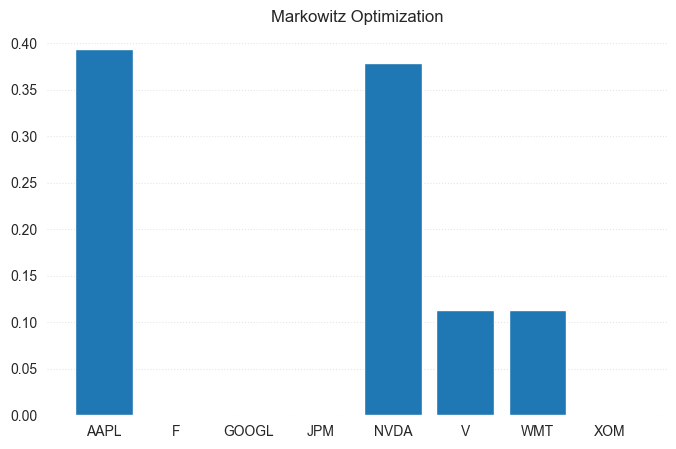

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
plt.bar(
    cleaned_weights.keys(),
    cleaned_weights.values()
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Markowitz Optimization')
plt.show()

#### Markowitz’s Curse

공분산, 상관관계 행렬의 조건수는 최대와 최저 고유값 사이의 비율의 절대값이다.

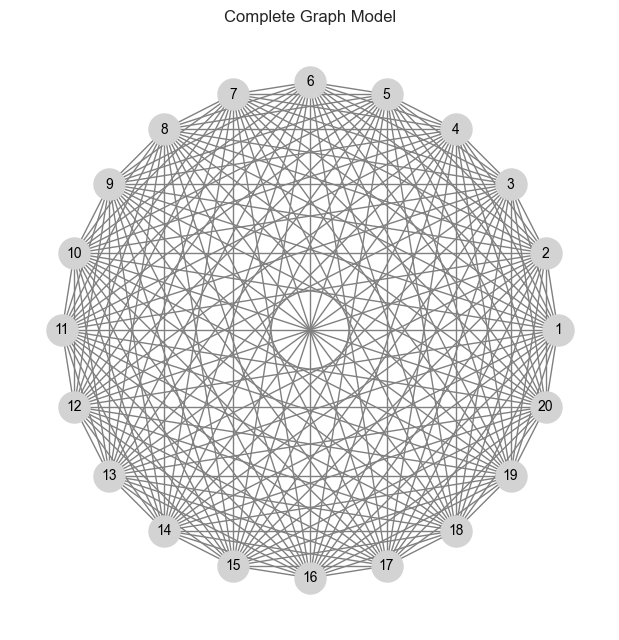

In [19]:
import networkx as nx
num_assets = 20
G = nx.complete_graph(num_assets)
labels = {i: f"{i+1}" for i in range(num_assets)}

plt.figure(figsize=(6, 6))
pos = nx.circular_layout(G) 
nx.draw(
    G, pos, 
    with_labels=True, 
    labels=labels, 
    node_size=500, 
    node_color='lightgray', 
    font_size=10, 
    edge_color='gray'
)
plt.title("Complete Graph Model")
plt.show()